# CH4 - 非監督式學習 H.W 

## Import package

In [1]:
# 載入常用套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Q1. - Q3. NBA with Clustering
+ 使用NBA2016/2017的球員資料來做接下來題目的回答。作為一個NBA老闆，我們想知道每位球員是透過無數次出手才累積高分的，還是是以較低出手數但次次均命中的類型。請用FG_PCT（進球率）跟PTS（分數）來做分群。

### Step1. Load the data

In [2]:
NBA = pd.read_csv(r'/Users/wen/Desktop/應用機器學習於Python/hw_data/hw4/nba_2016_2017_100.csv')
NBA

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,203080,Thomas Robinson,1610612747,LAL,26,48,15,33,0.313,11.7,...,337,56,5,"2,030,801,610,612,740",Thomas_Robinson_(basketball),trobinson0,1.05,5.0,1,0.126
96,202699,Tobias Harris,1610612765,DET,24,82,37,45,0.451,31.3,...,57,129,5,"2,026,991,610,612,760",Tobias_Harris,tobias31,16.00,16.0,1,0.022
97,203944,Julius Randle,1610612747,LAL,22,74,24,50,0.324,28.8,...,98,118,5,"2,039,441,610,612,740",Julius_Randle,j30_randle,3.28,13.2,1,0.358
98,1627767,Cheick Diallo,1610612740,NOP,20,17,9,8,0.529,11.7,...,314,146,5,"16,277,671,610,612,700",Cheick_Diallo,cheick_diallo13,1.31,5.1,1,0.015


### Step2. Deal with missing data

In [3]:
NBA.isnull().any() # there is no missing data in the dataset

PLAYER_ID                          False
PLAYER_NAME                        False
TEAM_ID                            False
TEAM_ABBREVIATION                  False
AGE                                False
                                   ...  
TWITTER_HANDLE                     False
SALARY_MILLIONS                    False
PTS                                False
ACTIVE_TWITTER_LAST_YEAR           False
TWITTER_FOLLOWER_COUNT_MILLIONS    False
Length: 63, dtype: bool

### Step3. Preprocessing

In [4]:
# Split data
FG_PCT = NBA.loc[:, 'FG_PCT']
PTS = NBA.loc[:, 'PTS']
nNBA = pd.DataFrame({'FG_PCT' : FG_PCT, 'PTS' :PTS})
nNBA

,FG_PCT,PTS
0,0.425,31.6
1,0.545,5.5
2,0.750,2.0
3,0.505,28.0
4,0.440,29.1
...,...,...
95,0.536,5.0
96,0.481,16.0
97,0.488,13.2
98,0.474,5.1


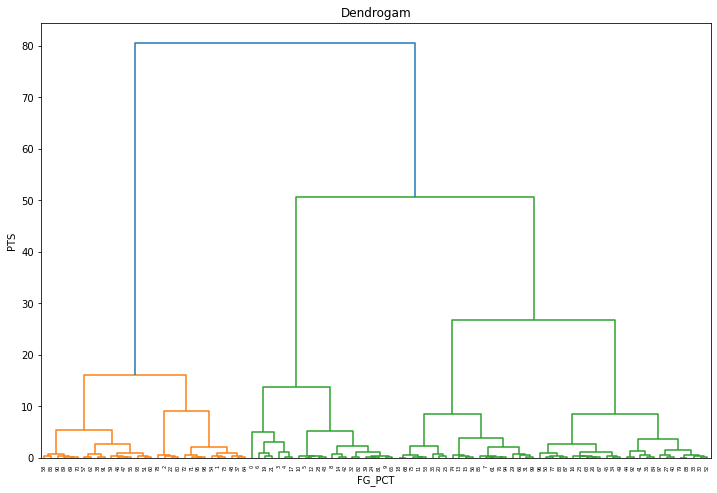

In [5]:
import scipy.cluster.hierarchy as hierarchy
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure(figsize=(12, 8))
dendrogram(ward(nNBA))
plt.title('Dendrogam')
plt.xlabel('FG_PCT')
plt.ylabel('PTS')
plt.show()

## Hierarchical Cluster
#### Q1. 假設有五組資料，進球率為X，分數為Y，請問以下四張圖，何者是透過 linkage = ward 所做出來的呢？

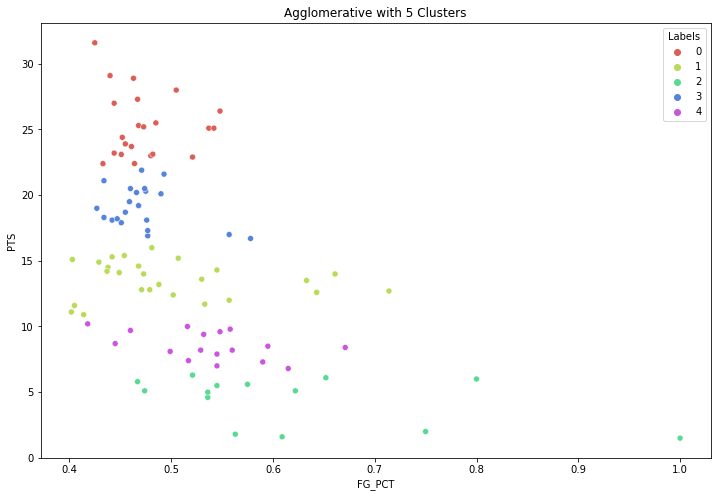

In [6]:
from sklearn.cluster import AgglomerativeClustering 

ml1 = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(nNBA)
nNBA['Labels'] = ml1.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(nNBA['FG_PCT'], nNBA['PTS'], hue=nNBA['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

## Kmeans
#### Q2. 透過KMean Elbow方法觀察最明顯轉折處，應該將這份資料分成幾群？（跑十輪後，選擇折線圖折線最明顯處，並將random_state設為1）。

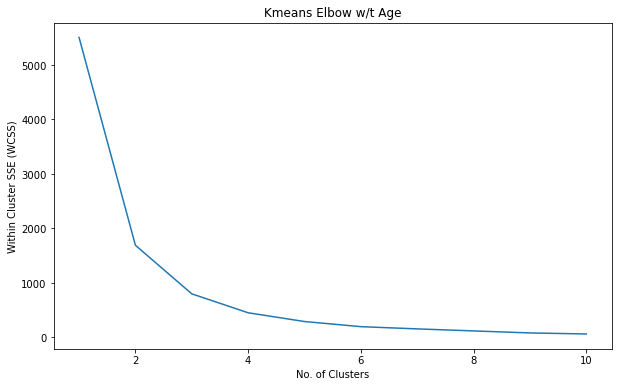

In [7]:
# 檢驗需要分成多少群
from sklearn.cluster import KMeans

wcss = [] # within-cluster sum of squares

for i in range(1, 11): # 跑10輪
    ml2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    ml2.fit(nNBA)
    wcss.append(ml2.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(1, 11)), y=wcss, ax=ax)
ax.set_title('Kmeans Elbow w/t Age')
ax.set_xlabel('No. of Clusters')
ax.set_ylabel('Within Cluster SSE (WCSS)')
plt.show()

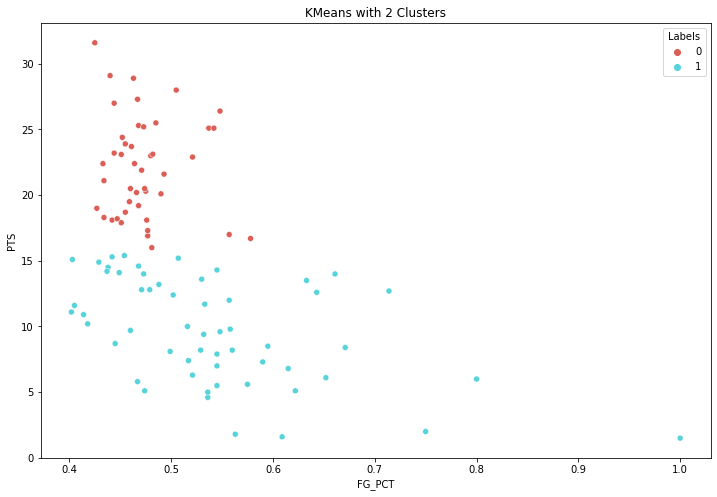

In [8]:
# 利用上步分群檢測後建模
ml3 = KMeans(n_clusters=2).fit(nNBA)

nNBA['Labels'] = ml3.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(nNBA['FG_PCT'], nNBA['PTS'], hue=nNBA['Labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters')
plt.show()

## Q4. winequality-red with PCA(組成成分分析)
#### Q4. 今天打算研究一下酒的組成成分，請使用紅酒的資料，先進行降維處理。試問如果n_components等於3，三個所佔比例分別為多少呢？（取到小數點後三位即可）

### Step1. Load the data

In [9]:
wine = pd.read_csv(r'/Users/wen/Desktop/應用機器學習於Python/hw_data/hw4/winequality-red.csv')
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Step2.PCA

In [10]:
# 進行PCA分析
from sklearn.decomposition import PCA

ml4 = PCA(n_components=3) # 設定找主要的3個成分
ml4.fit(wine)

PCA(n_components=3)

In [11]:
# 印出3個主要成分
ml4.explained_variance_ratio_

array([0.94607951, 0.04834835, 0.00259599])

In [12]:
# 查看各個user在不同主成分上的資訊負載量(loading)：
pca = ml4.transform(wine)
pca_df = pd.DataFrame(pca)
pca_df

,0,1,2
0,-13.222027,-2.031922,-1.181235
1,22.040255,4.401791,-0.354991
2,7.165362,-2.508321,-0.624638
3,13.428369,-1.946032,2.650260
4,-13.222027,-2.031922,-1.181235
...,...,...,...
1594,1.131806,16.304659,-1.912271
1595,9.488266,21.630751,-1.968144
1596,-3.432931,14.274277,-1.732279
1597,1.135574,16.307692,-2.189553


[Text(-6.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, '')]

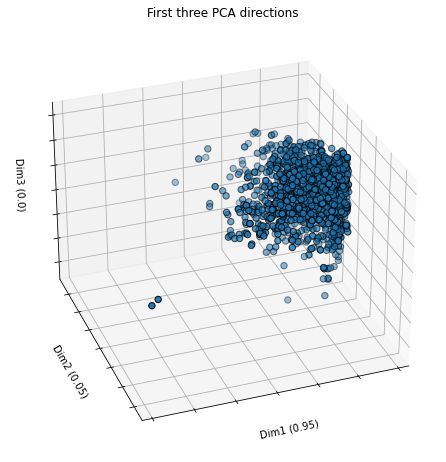

In [13]:
# PCA視覺化
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(wine)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel('Dim1 (' + '%s' % round(ml4.explained_variance_ratio_[0], 2) + ')')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Dim2 (' + '%s' % round(ml4.explained_variance_ratio_[1], 2) + ')')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Dim3 (' + '%s' % round(ml4.explained_variance_ratio_[2], 2) + ')')
ax.w_zaxis.set_ticklabels([])

## Q5. & Groceries data with Association Analysis(關聯分析)
+ 請使用Groceries_dataset檔案，依照Member_number跟Date組成一個交易紀錄，再結合所購買的商品去做關聯分析。

### Step1. Load the data

In [49]:
# read csv
Groceries = pd.read_csv(r'/Users/wen/Desktop/應用機器學習於Python/hw_data/hw4/Groceries_dataset.csv')
Groceries

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [50]:
# 合併 Member_number與 Date成一欄
Groceries['info'] = Groceries['Member_number'].astype('str') + Groceries['Date'] 
Groceries

,Member_number,Date,itemDescription,info
0,1808,21-07-2015,tropical fruit,180821-07-2015
1,2552,05-01-2015,whole milk,255205-01-2015
2,2300,19-09-2015,pip fruit,230019-09-2015
3,1187,12-12-2015,other vegetables,118712-12-2015
4,3037,01-02-2015,whole milk,303701-02-2015
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,447108-10-2014
38761,2022,23-02-2014,candy,202223-02-2014
38762,1097,16-04-2014,cake bar,109716-04-2014
38763,1510,03-12-2014,fruit/vegetable juice,151003-12-2014


#### Q5. 請使用apriori套件，並將做出結果的Min_support設為0.001，請將得出結果由高到低排列。請問第一高的support值跟其商品為何呢？

### Step2. count appear time

In [51]:
df_item = Groceries.copy()
df_item.rename(columns={'info':'info','itemDescription':'item'},inplace=True)
df_item['temp']=1
df = df_item.groupby(['info','item'])['temp'].sum().unstack().fillna(0)
df

item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
info,,,,,,,,,,,,,,,,,,,,,
100015-03-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
100024-06-2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100024-07-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100025-11-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100027-05-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499924-01-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
499926-12-2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500009-03-2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step3. Encode

In [52]:
# encoding
def encoder(i):
    if i <= 0:
        return 0
    elif i>=1:
        return 1

df = df.applymap(encoder)
df

item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
info,,,,,,,,,,,,,,,,,,,,,
100015-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
100024-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100024-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100025-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100027-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499924-01-2015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
499926-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500009-03-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step4. Association Analysis

In [53]:
from mlxtend.frequent_patterns import apriori, association_rules

start = time.time() # 設定計時器
freq_itemset = apriori(df, min_support=0.001, use_colnames=True) # 設定閾值
apriori_time = time.time() - start # 結算所費時間

In [65]:
freq_itemset
freq_itemset.sort_values(by = 'support',ascending=False)

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
...,...,...
344,0.001002,"(chicken, margarine)"
201,0.001002,"(chicken, bottled beer)"
202,0.001002,"(chocolate, bottled beer)"
516,0.001002,"(hamburger meat, pastry)"


In [55]:
rules = association_rules(freq_itemset, metric='lift', min_threshold=1)
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
198,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613
199,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963
201,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049
200,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345
128,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579
...,...,...,...,...,...,...,...,...,...
58,(candy),(citrus fruit),0.014369,0.053131,0.001002,0.069767,1.313120,0.000239,1.017884
57,(shopping bags),(butter milk),0.047584,0.017577,0.001002,0.021067,1.198600,0.000166,1.003566
45,(white bread),(brown bread),0.023993,0.037626,0.001002,0.041783,1.110471,0.000100,1.004338
56,(butter milk),(shopping bags),0.017577,0.047584,0.001002,0.057034,1.198600,0.000166,1.010022
